<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Boolean_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

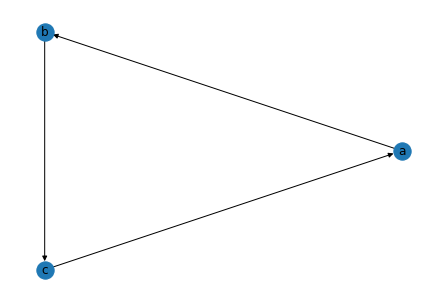

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create list to specify 'edges'
edges = [('a','b'),
         ('b','c'),
         ('c','a')]

# Variable to hold network
G = nx.DiGraph(edges)

# Visualize network
nx.draw_circular(G,with_labels=True)
plt.savefig('example_graph_drawing.png')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


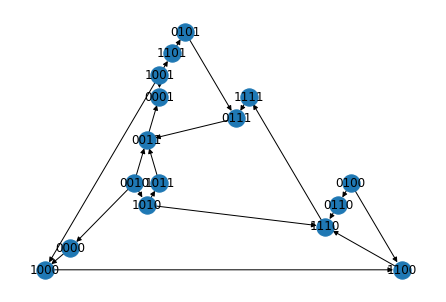

In [3]:
edges = [('0000','1000'),
         ('0000', '0000'),
         ('1000', '1000'),
         ('1000', '1100'),
         ('1100', '1100'),
         ('1100', '1110'),
         ('1110', '1111'),
         ('1111', '0111'),
         ('0111', '0011'),
         ('0011', '0001'),
         ('0010', '1010'),
         ('0010', '0000'),
         ('0010', '0011'),
         ('1010', '1110'),
         ('1010', '1011'),
         ('1011', '0011'),
         ('0110', '1110'),
         ('0100', '1100'),
         ('0100', '0110'),
         ('1101', '0101'),
         ('0101', '0111'),
         ('1001', '0001'),
         ('1001', '1101'),
         ('1001', '1000')]

G = nx.DiGraph(edges)
nx.draw_planar(G,with_labels=True)
plt.savefig('fifth_problem_graph_drawing.png')
        

In [4]:
file = open('figure-1-ii-model.txt')
lines = file.readlines()
new_list = []
rules = []
gene_with_rule = list()

#print(lines)

def create_list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    #print(l)
    gene_with_rule.append(l.split('\t'))
    #print(gene_with_rule[i])
    gene_with_rule[i][1] = gene_with_rule[i][1].replace(')', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace('(', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace(' ', '')
    gene_with_rule[i][1] = gene_with_rule[i][1].replace('\n', '')
  #if keywds[0] != keywds[1]:
    #keywds.append(keywds[i])
  allkeywds = list(keywds)
  allkeywds.extend([gene_with_rule[k][0] for k in range(length-1)])
  #print(allkeywds)
  lengthkeywds = len(allkeywds)
  for j in range(length -1):
    for k in range(lengthkeywds):
      if allkeywds[k] in gene_with_rule[j][1][0:len(gene_with_rule[j][1])-1]:
        gene_with_rule[j][1] = gene_with_rule[j][1].replace(allkeywds[k], allkeywds[k] + ',')
  return gene_with_rule

print(create_list_gene_with_rule(lines))


[['a', 'c'], ['b', 'a'], ['c', 'b']]


In [5]:
# Loop to remove unnecessary info and creates a new list = (gene, rule)
for line in lines:
  line = line.strip()
  line = line.split('\t')
  if line[1] != 'Rule':
    rules.append(line[1])
  #print(line[1].split(' '))
  for token in line[1].split(' '):
      if token != 'not' and token != '(' and token != ')' and token!= 'or' and token != "Rule":
        new_list.append((line[0],token))
#print(new_list)

proteins = [item[0] for item in create_list_gene_with_rule(lines)]
#print(len(create_list_gene_with_rule(lines)[1]))
#if len(create_list_gene_with_rule(lines)[0]) != len(create_list_gene_with_rule(lines)[1]):
  #proteins.append(create_list_gene_with_rule(lines)[1])
print(proteins)
#print(rules)

['a', 'b', 'c']


In [6]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  #for i,rule in enumerate(create_list_gene_with_rule(list(lines))):
  for rule in create_list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      #return(rule[1],i)
      return(rule[1])
print(get_formula('a',list(lines)))
#print(create_list_gene_with_rule(list(lines)))

c


In [7]:
# Function to determine protein state based on the rule for the system 
def compute_protein_state(formula, net_state): 
  # Loop to return value based on formula
  #print(formula)
  tokens = formula.split(',')
  print(tokens)
  if 'not' in tokens:
    activator_flag = False
    #activator_state = 0
    inhibitor_state = 0
    for j in range(0, len(tokens)):
      # all prot before not are activators, after not are inhibitors
      #if tokens.index(tokens[j]) < tokens.index('not'):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens.index(tokens[j]) < tokens.index('not'):
          if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            activator_state = 0
            activator_flag = True
            #print(activator_flag)
            state = net_state[k]
            if state == 1:
              activator_state = 1
            if state == 0:
              activator_state = 0
        if j > tokens.index('not'):
          #print(tokens.index('not'))
          if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            state = net_state[k]
            if state == 1:
              inhibitor_state = 0
            if state == 0:
              inhibitor_state = 1
              #print(inhibitor_state)
              #print(activator_flag, activator_state, inhibitor_state)
              break
    if activator_flag == True:
      if activator_state == 1 and inhibitor_state == 1: 
        return 1
      else:
        return 0
    else:   # activator_flag == False
      for k in range(0,len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
            state = net_state[k]
            #print(state)
            if state == 1:
              inhibitor_state = 0
              print(activator_flag, inhibitor_state)
              print(tokens[j], state)
            if state == 0:
              inhibitor_state = 1
              break
      if inhibitor_state == 0:
        return 0
      else:
        return 1
     
  elif 'or' in tokens:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
          state = net_state[k]
          if state == 1:
            return 1
    return 0
  elif '' in tokens:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
       #print(create_list_gene_with_rule(lines)[k][0])
        if tokens[j] == '':
          return net_state[k]
  else:
    for j in range(0, len(tokens)):
      for k in range(0, len(create_list_gene_with_rule(lines))):
        if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
          state = net_state[k]
          if state == 1:
            return 1
          elif state == 0:
            return 0
print(compute_protein_state(get_formula('a', lines), [0,0,0]))

['c']
0


In [8]:
# Function to determine protein state synchronously
def compute_next_protein_state_synchronous(gene_with_rule, net_state, lines):
  next_state_list = list(net_state)
  #print(len(gene_with_rule))
  for i in range(len(gene_with_rule)):
    formula = get_formula(gene_with_rule[i][0],lines)
    new_state_value = compute_protein_state(formula, net_state)
    next_state_list[i] = new_state_value
  #print(new_state_value)
  return next_state_list
print(compute_next_protein_state_synchronous(create_list_gene_with_rule(lines), [1,1,1], lines))

['c']
['a']
['b']
[1, 1, 1]


In [9]:
# Function to determine the protein state asynchronously
def compute_next_protein_state_asynchronous(gene_with_rule, net_state, lines):  
  next_state_list = list()
  #print(proteins)
  #for prot in proteins:
  #  next_state_list.append([prot, net_state])
  for gwr in gene_with_rule:
    next_state_list.append([gwr[0], list(net_state)])
  #print(next_state_list)
  for i in range(0, len(next_state_list)):
    next_state_list[i][1][i] = compute_protein_state(gene_with_rule[i][1], list(net_state))
  return next_state_list
print(compute_next_protein_state_asynchronous(create_list_gene_with_rule(lines), [1,1,1], lines))

['c']
['a']
['b']
[['a', [1, 1, 1]], ['b', [1, 1, 1]], ['c', [1, 1, 1]]]


In [10]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_synchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    edgelist.append((start_state, next_state_space))
    #print(next_state_space[0][1])
    #print(edgelist)

  return edgelist


#if next_state_space[k][1] not in edgelist:
#  edgelist.append((start_state, next_state_space[k][1]))

output = compute_state_space_network_synchronous(create_list_gene_with_rule(lines), [1,1,1])
#print(output)

['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']


[['000'], ['111'], ['110', '011', '101'], ['001', '100', '010']]


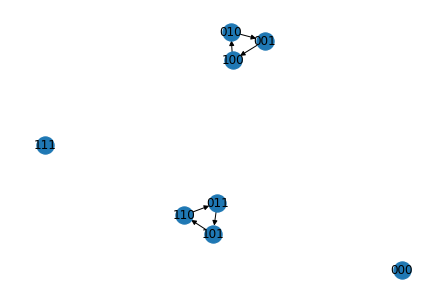

In [11]:
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
G = nx.DiGraph(edgelist)
print(list(nx.simple_cycles(G)))
#print(nx.cycle_basis(G,0))
#if the edge of the graph is a self-loop --> steady state
nx.draw_spring(G, with_labels=True)
  
#print(edgelist)
plt.savefig('state_space_network_synchronous_model_ii.png')

In [12]:
def compute_state_space_network_asynchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_asynchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    #print(next_state_space[0][1])
    #print(edgelist)
    for k in range(len(next_state_space)):
      if next_state_space[k][1] not in edgelist:
        edgelist.append((start_state, next_state_space[k][1]))
      #if edgelist.count(next_state_space) > 1: 
  return edgelist

output_a = compute_state_space_network_asynchronous(create_list_gene_with_rule(lines), [1,1,1])
print(output_a)

['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
['c']
['a']
['b']
[([0, 0, 0], [0, 0, 0]), ([0, 0, 0], [0, 0, 0]), ([0, 0, 0], [0, 0, 0]), ([0, 0, 1], [1, 0, 1]), ([0, 0, 1], [0, 0, 1]), ([0, 0, 1], [0, 0, 0]), ([0, 1, 0], [0, 1, 0]), ([0, 1, 0], [0, 0, 0]), ([0, 1, 0], [0, 1, 1]), ([0, 1, 1], [1, 1, 1]), ([0, 1, 1], [0, 0, 1]), ([0, 1, 1], [0, 1, 1]), ([1, 0, 0], [0, 0, 0]), ([1, 0, 0], [1, 1, 0]), ([1, 0, 0], [1, 0, 0]), ([1, 0, 1], [1, 0, 1]), ([1, 0, 1], [1, 1, 1]), ([1, 0, 1], [1, 0, 0]), ([1, 1, 0], [0, 1, 0]), ([1, 1, 0], [1, 1, 0]), ([1, 1, 0], [1, 1, 1]), ([1, 1, 1], [1, 1, 1]), ([1, 1, 1], [1, 1, 1]), ([1, 1, 1], [1, 1, 1])]


[('000', '000'), ('000', '000'), ('000', '000'), ('001', '101'), ('001', '001'), ('001', '000'), ('010', '010'), ('010', '000'), ('010', '011'), ('011', '111'), ('011', '001'), ('011', '011'), ('100', '000'), ('100', '110'), ('100', '100'), ('101', '101'), ('101', '111'), ('101', '100'), ('110', '010'), ('110', '110'), ('110', '111'), ('111', '111'), ('111', '111'), ('111', '111')]


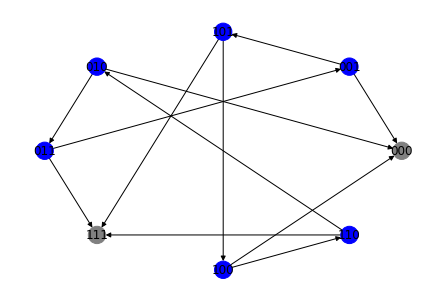

In [13]:
edgelist_a = []
for seq in output_a:
  sequence = seq
  edgelist_a.extend([(''.join([str(st) for st in sequence[i]]),
             ''.join([str(st) for st in sequence[i+1]])) for i in range(len(sequence)-1)])
  
print(edgelist_a)
G = nx.DiGraph(edgelist_a)
nodes = G.nodes()
#print(nodes)
cycle_a = (list(nx.simple_cycles(G)))
#print(cycle_a)
color_map = []
for node in G:
  if node in cycle_a[8]:
    color_map.append('blue')
  else: 
    color_map.append('grey')
    
    
# self-loop
self_loop = list(nx.nodes_with_selfloops(G))
self_loop_edges = list(nx.selfloop_edges(G))
#print(self_loop_edges)
#print(self_loop)

nx.draw_circular(G, node_color=color_map, with_labels=True)
plt.savefig('state_space_network_asynchronous_model_ii.png')

In [14]:
def find_limit_cycle(nodes):
  limit_cycle = list()
  #G = nx.DiGraph(edgelist_a)
  cycle_a = list(nx.simple_cycles(G))
  return cycle_a

print(find_limit_cycle(G))

[['000'], ['001'], ['101'], ['111'], ['100'], ['010'], ['011'], ['110'], ['110', '010', '011', '001', '101', '100']]


In [15]:
def find_longer_list(nodes):
  limit_cycle = find_limit_cycle(nodes)
  long_limit_cycle = list()
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle

print(find_longer_list(G))

[['110', '010', '011', '001', '101', '100']]


In [16]:
def find_self_cycle(nodes):
  self_cycle = list()
  G = nx.DiGraph(edgelist_a)
  self_loop_edges = list(nx.selfloop_edges(G))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(edgelist_a))

['000', '001', '101', '010', '011', '111', '100', '110']


In [17]:
# Creates a list of all nodes that are not steady states and removes duplicates
def find_not_steady_states(nodes):
  not_steady_state = list()
  self_cycle = find_self_cycle(nodes)
  long_limit_cycle = find_longer_list(nodes)
  #print(len(edgelist_a))
  #print(len(self_cycle))
  for i in range(len(edgelist_a)):
    for j in range(len(self_cycle)):
      if self_cycle[j] == edgelist_a[i][0] and self_cycle[j] != edgelist_a[i][1]:
        if self_cycle[j] not in not_steady_state:
          not_steady_state.append(self_cycle[j])
  return not_steady_state
print(find_not_steady_states(G))

# Remove the states that are not steady states from a list that contains all the possible nodes
def find_steady_states(nodes):
  steady_states = list()
  self_cycle = find_self_cycle(nodes)
  not_steady_state = find_not_steady_states(nodes)
  steady_states = [x for x in self_cycle if x not in not_steady_state]
  return steady_states
print(find_steady_states(G))  

['001', '010', '011', '100', '101', '110']
['000', '111']


In [0]:
# Graphspace Asynchronous
def graphspace_asynchronous(edgelist_a, G):
  limit_cycle = find_longer_list(nodes)
  steady_states = find_steady_states(nodes)
  random_walk = individual_random_walk(nodes)
  
  file_name = open('figure_ii_asynchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s', \"width\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for cycle in range(len(limit_cycle)):
    if cycle in limit_cycle:
      edge_color == 'blue'
    else:
      edge_color == 'grey'
    
  for state in range(len(steady_states)):
    if state in steady_state:
      shape1 == 'rectangle'
      color1 == 'red'
      edge_color == 'grey'
    else:
      shape1 == 'ellipse'
      color1 == 'grey'
      
  for edge in range(len(random_walk)):
    if edge in random_walk:
      edge_width += 1 
        
        
  for i in range(0, len(edgelist_a)):
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist_a[i][0], edgelist_a[i][1], edgelist_a[i][0], edgelist_a[i][1]))
    file_name.write(style % (shape1, color1, edgelist_a[i][0], shape2, color2, edgelist_a[i][1], 
                             edge_color, edge_width, edgelist_a[i][0], edgelist_a[i][1]))
    
  file_name.close()   
#print(graphspace_asynchronous(edgelist_a, G))

In [103]:
file_name = open('figure_ii_asynchronous.txt', 'r+')
print(file_name.read())

In [0]:
# Graphspace Synchronous
file_name = open('figure_ii_synchronous.txt', 'w+')
file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')


head1 = "{\"head\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
tail1 = "\"tail\": {'spec': {'shape': \"ellipse\",'color': \"grey\",'border': \"black\"}, \"id\": '%s'},"
edge1 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": 'blue'}, \"id\": '%s-%s'}}\n"

head2 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"red\",'border': \"black\"}, \"id\": '%s'},"
tail2 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"red\",'border': \"black\"}, \"id\": '%s'},"
edge2 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle'}, \"id\": '%s-%s'}}\n"

head3 = "{\"head\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
tail3 = "\"tail\": {'spec': {'shape': \"rectangle\",'color': \"blue\",'border': \"black\"}, \"id\": '%s'},"
edge3 = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"line-color\": 'blue'}, \"id\": '%s-%s'}}\n"

style1 = head1 + tail1 + edge1
style2 = head2 + tail2 + edge2
style3 = head3 + tail3 + edge3

#print(edgelist)

for i in range(0, len(edgelist)):
  file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
  file_name.write(style1 % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
 
  
file_name.close()

file_name = open('figure_ii_synchronous.txt', 'r+')
#print(file_name.read())

In [53]:
import random

def individual_random_walk(nodes):
  path = []
  random_path = []
  all_possible_nodes = find_self_cycle(nodes)
  steady_states = list(find_steady_states(nodes))
  path = random.choice(all_possible_nodes)
  random_path.append(path)
  print(path)
  G = nx.DiGraph(edgelist_a)
  count = 0 
  while path not in steady_states and count < 100:  
    #print(path)
    path_index = []
    for i in range(len(edgelist_a)):
      if path == edgelist_a[i][0]:
        path_index.append(edgelist_a[i][1])
    #print(path_index)
    next_edge = random.choice(path_index)
    random_path.append(next_edge)
    path = str(next_edge)
    count += 1
  return random_path
  
print(individual_random_walk(G))

001
['001', '001', '001', '000']


In [27]:
def random_walk(G):
  random_path = []
  all_nodes = G.nodes(edgelist_a)
  steady_states = list(find_steady_states(nodes))
  start = random.choice(all_nodes)
  random_path.append(start)
  #print(random_path)
  node = start
  while node not in steady_states:
    neighbors = G.neighbors(node)
    next_state = random.choice(neighbors)
    random_path.append(next_state)
    node = next_state
  return random_path
  
print(random_walk(G))

KeyError: ignored

In [62]:
def continue_random_walk(nodes):
  random_walk = individual_random_walk(nodes)
  #print(random_walk)
  steps = 100
  num_walks = 100
  print(random_walk(steps))
  walks = [random_walk(steps) for i in range(0, num_walks)]
  average_walk = numpy.sum(walks, 0)*1.0/num_walks
  return walks, average_walk

print(continue_random_walk(G))
  

001


TypeError: ignored

In [93]:
def count_random_walk(nodes):
  random_walk = individual_random_walk(nodes)
  print(random_walk)
  edges = G.edges()
  nodes = G.nodes(edgelist_a)
  pos = nx.spring_layout(G)
  width = 0
  for i in range(len(edges)):
    G.add_edge(edgelist_a[i][0], edgelist_a[i][1])
    if random_walk.count(node for node in random_walk) > 1:
      width += 1
    return width
  #nx.draw_networkx_edges(G, pos, edges, width)
  
print(count_random_walk(G))

101
['101', '111']
0


In [23]:
def node_degrees(nodes):
  in_degree = G.in_degree()
  out_degree = G.out_degree()
  print(in_degree)
  print(out_degree)
  
print(node_degrees(G))


[('000', 4), ('001', 2), ('101', 2), ('010', 2), ('011', 2), ('111', 4), ('100', 2), ('110', 2)]
[('000', 1), ('001', 3), ('101', 3), ('010', 3), ('011', 3), ('111', 1), ('100', 3), ('110', 3)]
None
